**Problem Statement**    

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike

In this demo, your goal is to reconstruct digits images from a dataset of thousands of handwritten images using an Autoencoder

In [1]:
#Importing Required Libraries

import tensorflow as tf #Importing Tensorflow Library
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

print('Tensorflow Version:',tf.__version__)

Tensorflow Version: 2.6.0


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
#Build Encoder Model
encoder = Model(input_img, encoded)

In [4]:
#Build Decoder Model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


##Pre-process the dataset

In [8]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784

In [10]:
import numpy as np 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [18]:
##Train the autoencoder for 100 epochs
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0039 - val_lo

##**Data Visualization**


Now, we can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib

In [19]:
# encode and decode some digits
# note that we take them from the test set

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

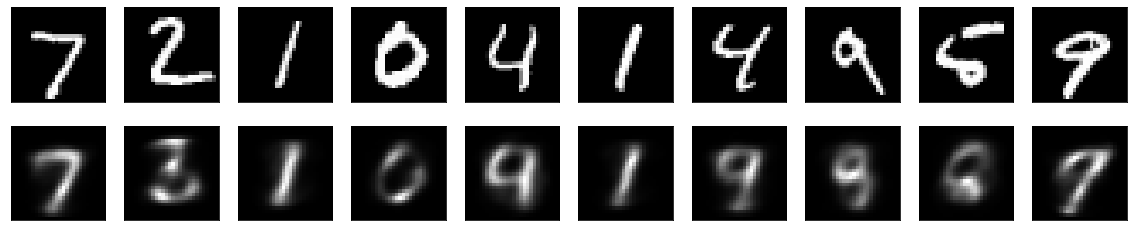

In [20]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()